### Importing pandas,matplotlib and seaborn. And adding data

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
adult=pd.read_csv('adult.csv')
adult.head()

,Age,Work-class,fnlwt,education,education-num,marital-status,ocupation,relation,race,sex,capital-gain,capital-loss,hour per weak,native-counrty,output
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Finding percentage of null values in each column

In [47]:
for col in adult.columns:
    c=(adult[col].isnull().sum()/adult.shape[0])*100
    print(col,c)

Age 0.0
 Work-class 0.0
fnlwt 0.0
education 0.0
education-num 0.0
marital-status 0.0
ocupation 0.0
relation 0.0
 race 0.0
 sex 0.0
capital-gain 0.0
capital-loss 0.0
hour per weak 0.0
native-counrty 0.0
 output 0.0


### Finding the columns whose data type is object that means columns which are categoricals

In [48]:
s=(adult.dtypes=='object')
categorical=list(s[s].index)
categorical


[' Work-class',
 'education',
 'marital-status',
 'ocupation',
 'relation',
 ' race',
 ' sex',
 'native-counrty',
 ' output']

In [49]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# for cols in categorical:
#     adult[cols]=encoder.fit_transform(adult[cols])

### finding correlations all non categorical data

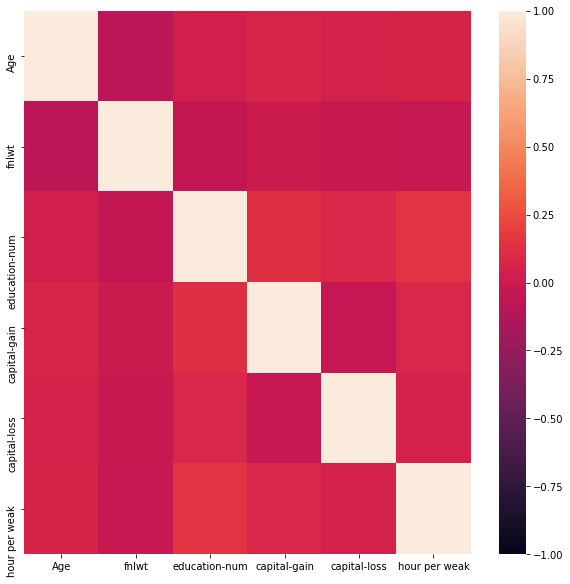

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
sns.heatmap(adult.corr(),vmin=-1)
plt.show()

### converting output data to binary form if income <=50k :0 and if income>50k :1

In [51]:
adult[adult.columns[14]]=pd.Categorical(adult[adult.columns[14]]).codes
adult[adult.columns[14]]

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name:  output, Length: 32560, dtype: int8

### finding list of non-categorical columns name

In [52]:
w=(adult.dtypes!='object')
not_cat=list(w[w].index)[:6]
not_cat

['Age',
 'fnlwt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hour per weak']

### scaling-down the non-categorical features

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
adult[not_cat]=scaler.fit_transform(adult[not_cat])

In [54]:
adult.head()

,Age,Work-class,fnlwt,education,education-num,marital-status,ocupation,relation,race,sex,capital-gain,capital-loss,hour per weak,native-counrty,output
0,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States,0
1,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,0
2,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States,0
3,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba,0
4,0.273973,Private,0.184932,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States,0


In [55]:
adult.describe()

,Age,fnlwt,education-num,capital-gain,capital-loss,hour per weak,output
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.295639,0.120548,0.605373,0.010776,0.020043,0.402423,0.240817
std,0.186858,0.071685,0.171514,0.073855,0.092508,0.125996,0.427586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071682,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.273973,0.112793,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,0.152653,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### univariate annalysis of work-class


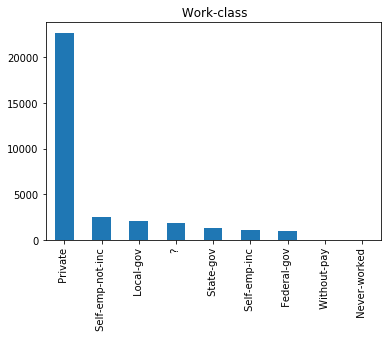

In [56]:
count=adult[adult.columns[1]].value_counts()
count.plot.bar(title=adult.columns[1])

### Bivariate annalysis of work-class and output

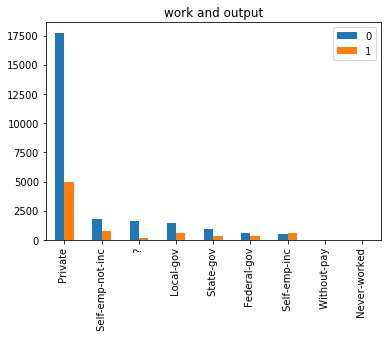

In [57]:
work_output=pd.DataFrame()
work_output[0]=adult[adult[adult.columns[14]]==0][adult.columns[1]].value_counts()
work_output[1]=adult[adult[adult.columns[14]]==1][adult.columns[1]].value_counts()
work_output.plot.bar(title="work and output")
# for p in w_o.patches:
#     w_o.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

### checking percentage of work-class  for each type as output as 1 out of total output

In [58]:
val=((work_output[1]/(work_output[0]+work_output[1]))*100)
print(val)
print(adult[adult.columns[1]].unique())

 Private             21.867289
 Self-emp-not-inc    28.492719
 ?                   10.403050
 Local-gov           29.479216
 State-gov           27.216654
 Federal-gov         38.645833
 Self-emp-inc        55.734767
 Without-pay               NaN
 Never-worked              NaN
dtype: float64
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


### Assigning values to the categorical data according to how it effects the income

In [59]:
adult[adult.columns[1]]=pd.Categorical(adult[adult.columns[1]],categories=[adult[adult.columns[1]].unique()[8],adult[adult.columns[1]].unique()[7],adult[adult.columns[1]].unique()[5],adult[adult.columns[1]].unique()[1],adult[adult.columns[1]].unique()[2],adult[adult.columns[1]].unique()[0],adult[adult.columns[1]].unique()[4],adult[adult.columns[1]].unique()[3],adult[adult.columns[1]].unique()[6]],ordered=True).codes
adult.describe()

,Age,Work-class,fnlwt,education-num,capital-gain,capital-loss,hour per weak,output
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.295639,3.620178,0.120548,0.605373,0.010776,0.020043,0.402423,0.240817
std,0.186858,1.390911,0.071685,0.171514,0.073855,0.092508,0.125996,0.427586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,3.000000,0.071682,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.273973,3.000000,0.112793,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,3.000000,0.152653,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Education vs output

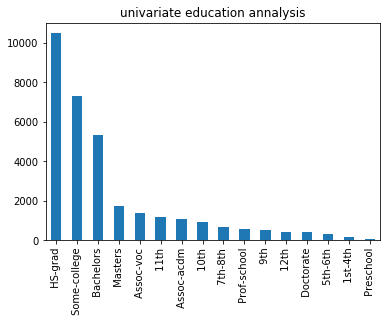

In [60]:
count1=adult[adult.columns[3]].value_counts()
count1.plot.bar(title="univariate education annalysis")

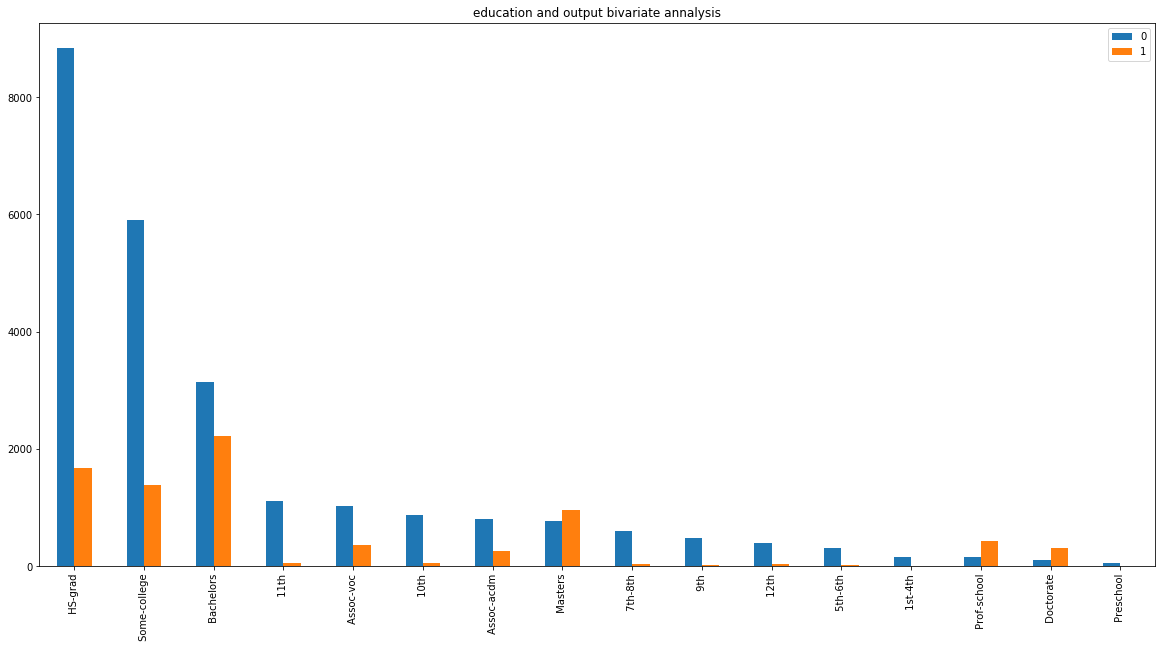

In [61]:
eo=pd.DataFrame()
eo[0]=adult[adult[adult.columns[14]]==0][adult.columns[3]].value_counts()
eo[1]=adult[adult[adult.columns[14]]==1][adult.columns[3]].value_counts()
eo.plot.bar(title="education and output bivariate annalysis",figsize=(20,10))

### checking percentage of education  for each type as output as 1 out of total output

In [62]:
ch=(eo[1]/(eo[1]+eo[0]))*100
print(ch)
print(adult[adult.columns[3]].unique())

 HS-grad         15.950862
 Some-college    19.023454
 Bachelors       41.483003
 11th             5.106383
 Assoc-voc       26.121563
 10th             6.645230
 Assoc-acdm      24.835989
 Masters         55.658735
 7th-8th          6.191950
 9th              5.252918
 12th             7.621247
 5th-6th          4.804805
 1st-4th          3.571429
 Prof-school     73.437500
 Doctorate       74.092010
 Preschool             NaN
dtype: float64
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


### Assigning values to the categorical data according to how it effects the income

In [63]:
adult[adult.columns[3]]=pd.Categorical(adult[adult.columns[3]],categories=[" Preschool", " 1st-4th" ," 5th-6th"," 11th" ," 9th"," 7th-8th",
                                                                           " 10th"," 12th"," HS-grad"," Some-college"," Assoc-acdm"," Assoc-voc",
                                                                           " Bachelors"," Masters"," Prof-school"," Doctorate"
                                                                          ],ordered=True).codes

In [64]:
adult.head()

,Age,Work-class,fnlwt,education,education-num,marital-status,ocupation,relation,race,sex,capital-gain,capital-loss,hour per weak,native-counrty,output
0,0.452055,5,0.048238,12,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States,0
1,0.287671,3,0.138113,8,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,0
2,0.493151,3,0.151068,3,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States,0
3,0.150685,3,0.221488,12,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba,0
4,0.273973,3,0.184932,13,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States,0


# occupation column annalysis


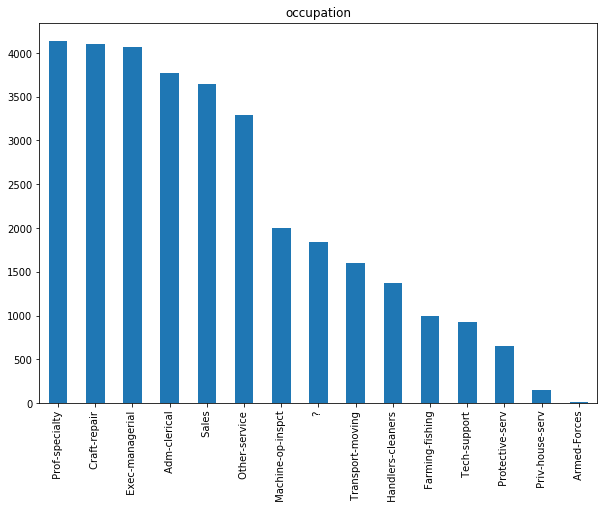

In [65]:
count2=adult[adult.columns[6]].value_counts()
count2.plot.bar(title="occupation",figsize=(10,7))

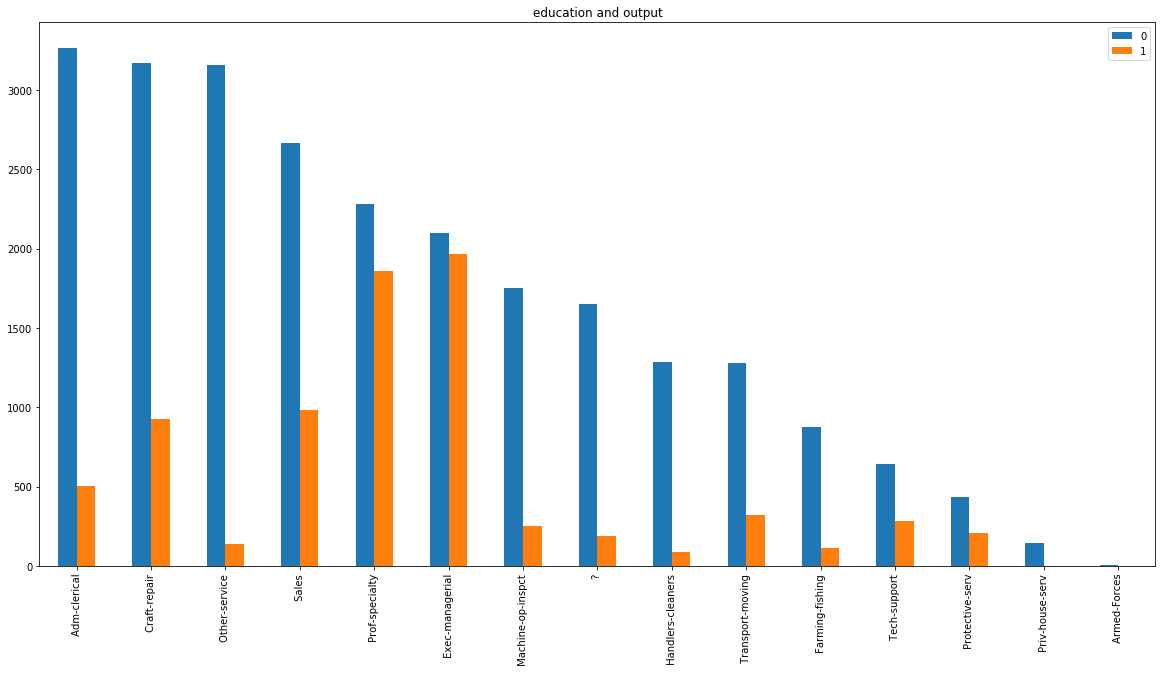

In [66]:
occup=pd.DataFrame()
occup[0]=adult[adult[adult.columns[14]]==0][adult.columns[6]].value_counts()
occup[1]=adult[adult[adult.columns[14]]==1][adult.columns[6]].value_counts()
occup.plot.bar(title="education and output",figsize=(20,10))
# occup.plot.bar(title="occupation and output")
#adult[adult.columns[1]].unique()[4]

### checking percentage of occupation  for each type as output as 1 out of total output

In [67]:
p1=(occup[1]/(occup[0]+occup[1]))*100
d=p1.sort_values().index
d

Index([' Priv-house-serv', ' Other-service', ' Handlers-cleaners', ' ?',
       ' Armed-Forces', ' Farming-fishing', ' Machine-op-inspct',
       ' Adm-clerical', ' Transport-moving', ' Craft-repair', ' Sales',
       ' Tech-support', ' Protective-serv', ' Prof-specialty',
       ' Exec-managerial'],
      dtype='object')

### Assigning values to the categorical data according to how it effects the income

In [68]:
adult[adult.columns[6]]=pd.Categorical(adult[adult.columns[6]],categories=d,ordered=True).codes
adult.describe()

,Age,Work-class,fnlwt,education,education-num,ocupation,capital-gain,capital-loss,hour per weak,output
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.295639,3.620178,0.120548,9.050338,0.605373,8.288452,0.010776,0.020043,0.402423,0.240817
std,0.186858,1.390911,0.071685,2.651187,0.171514,4.190901,0.073855,0.092508,0.125996,0.427586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,3.000000,0.071682,8.000000,0.533333,6.000000,0.000000,0.000000,0.397959,0.000000
50%,0.273973,3.000000,0.112793,9.000000,0.600000,9.000000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,3.000000,0.152653,11.000000,0.733333,13.000000,0.000000,0.000000,0.448980,0.000000
max,1.000000,8.000000,1.000000,15.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
adult.head(20)

,Age,Work-class,fnlwt,education,education-num,marital-status,ocupation,relation,race,sex,capital-gain,capital-loss,hour per weak,native-counrty,output
0,0.452055,5,0.048238,12,0.800000,Married-civ-spouse,14,Husband,White,Male,0.000000,0.0,0.122449,United-States,0
1,0.287671,3,0.138113,8,0.533333,Divorced,2,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,0
2,0.493151,3,0.151068,3,0.400000,Married-civ-spouse,2,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0
3,0.150685,3,0.221488,12,0.800000,Married-civ-spouse,13,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,0
4,0.273973,3,0.184932,13,0.866667,Married-civ-spouse,14,Wife,White,Female,0.000000,0.0,0.397959,United-States,0
5,0.438356,3,0.100448,4,0.266667,Married-spouse-absent,1,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica,0
6,0.479452,5,0.134036,8,0.533333,Married-civ-spouse,14,Husband,White,Male,0.000000,0.0,0.448980,United-States,1
7,0.191781,3,0.022749,13,0.866667,Never-married,13,Not-in-family,White,Female,0.140841,0.0,0.500000,United-States,1
8,0.342466,3,0.099947,12,0.800000,Married-civ-spouse,14,Husband,White,Male,0.051781,0.0,0.397959,United-States,1
9,0.273973,3,0.182135,9,0.600000,Married-civ-spouse,14,Husband,Black,Male,0.000000,0.0,0.806122,United-States,1


# dealing with large number of unique value of country 

In [70]:
adult[adult.columns[13]].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [71]:
adult[adult.columns[13]]=adult[adult.columns[13]].replace(" United-States",1)
adult[adult.columns[13]]=adult[adult.columns[13]].replace(adult[adult.columns[13]].unique()[1:],0)

# adult[adult[adult.columns[13]]==" United-States"][adult.columns[13]]=0
# adult.iloc[(adult[adult.columns[13]]!=" United-States"),adult.columns[13]]=0

In [72]:
adult.head()

,Age,Work-class,fnlwt,education,education-num,marital-status,ocupation,relation,race,sex,capital-gain,capital-loss,hour per weak,native-counrty,output
0,0.452055,5,0.048238,12,0.800000,Married-civ-spouse,14,Husband,White,Male,0.0,0.0,0.122449,1,0
1,0.287671,3,0.138113,8,0.533333,Divorced,2,Not-in-family,White,Male,0.0,0.0,0.397959,1,0
2,0.493151,3,0.151068,3,0.400000,Married-civ-spouse,2,Husband,Black,Male,0.0,0.0,0.397959,1,0
3,0.150685,3,0.221488,12,0.800000,Married-civ-spouse,13,Wife,Black,Female,0.0,0.0,0.397959,0,0
4,0.273973,3,0.184932,13,0.866667,Married-civ-spouse,14,Wife,White,Female,0.0,0.0,0.397959,1,0


In [73]:
adult.describe()

,Age,Work-class,fnlwt,education,education-num,ocupation,capital-gain,capital-loss,hour per weak,native-counrty,output
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.295639,3.620178,0.120548,9.050338,0.605373,8.288452,0.010776,0.020043,0.402423,0.895854,0.240817
std,0.186858,1.390911,0.071685,2.651187,0.171514,4.190901,0.073855,0.092508,0.125996,0.305455,0.427586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,3.000000,0.071682,8.000000,0.533333,6.000000,0.000000,0.000000,0.397959,1.000000,0.000000
50%,0.273973,3.000000,0.112793,9.000000,0.600000,9.000000,0.000000,0.000000,0.397959,1.000000,0.000000
75%,0.424658,3.000000,0.152653,11.000000,0.733333,13.000000,0.000000,0.000000,0.448980,1.000000,0.000000
max,1.000000,8.000000,1.000000,15.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### one-hot encodings to categorical data

In [74]:
t=(adult.dtypes==object)
a=list(t[t].index)
a

['marital-status', 'relation', ' race', ' sex']

In [75]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
po=pd.DataFrame(encoder.fit_transform(adult[a]))

In [76]:
adult.drop(a,inplace=True,axis=1)

In [77]:
adult.head()

,Age,Work-class,fnlwt,education,education-num,ocupation,capital-gain,capital-loss,hour per weak,native-counrty,output
0,0.452055,5,0.048238,12,0.800000,14,0.0,0.0,0.122449,1,0
1,0.287671,3,0.138113,8,0.533333,2,0.0,0.0,0.397959,1,0
2,0.493151,3,0.151068,3,0.400000,2,0.0,0.0,0.397959,1,0
3,0.150685,3,0.221488,12,0.800000,13,0.0,0.0,0.397959,0,0
4,0.273973,3,0.184932,13,0.866667,14,0.0,0.0,0.397959,1,0


In [78]:
data=pd.concat([adult,po],axis=1)

data.head()

,Age,Work-class,fnlwt,education,education-num,ocupation,capital-gain,capital-loss,hour per weak,native-counrty,...,10,11,12,13,14,15,16,17,18,19
0,0.452055,5,0.048238,12,0.800000,14,0.0,0.0,0.122449,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.287671,3,0.138113,8,0.533333,2,0.0,0.0,0.397959,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.493151,3,0.151068,3,0.400000,2,0.0,0.0,0.397959,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.150685,3,0.221488,12,0.800000,13,0.0,0.0,0.397959,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.273973,3,0.184932,13,0.866667,14,0.0,0.0,0.397959,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### As value_counts of output is not equal StratifiedShuffleSplit is used for train test splits

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit
splits=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in splits.split(data,data[data.columns[10]]):
    train_data=data.iloc[train_index]
    test_data=data.iloc[test_index]
y_train=train_data[train_data.columns[10]]
y_test=test_data[test_data.columns[10]]
x_train=pd.concat([train_data.iloc[:,:10],train_data.iloc[:,11:]],axis=1)
x_test=test_data.drop(test_data.columns[10],axis=1)


# Selecting best model 

In [80]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(tol=0.01)
model.fit(x_train,y_train)

C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [81]:
from sklearn.metrics import classification_report
print('classification report for test_data in logistic regression \n',classification_report(y_test,model.predict(x_test)))

classification report for test_data in logistic regression 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4944
           1       0.75      0.58      0.66      1568

    accuracy                           0.85      6512
   macro avg       0.81      0.76      0.78      6512
weighted avg       0.85      0.85      0.85      6512



In [82]:

print('classification report for train_data in logistic regression \n',classification_report(y_train,model.predict(x_train)))

classification report for train_data in logistic regression 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     19775
           1       0.72      0.56      0.63      6273

    accuracy                           0.84     26048
   macro avg       0.79      0.74      0.76     26048
weighted avg       0.83      0.84      0.83     26048



In [83]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(max_depth=7)
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
from sklearn.metrics import classification_report
print('classification report for test_data in RandomForestClassification \n',classification_report(y_test,model1.predict(x_test)))

classification report for test_data in RandomForestClassification 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4944
           1       0.81      0.54      0.65      1568

    accuracy                           0.86      6512
   macro avg       0.84      0.75      0.78      6512
weighted avg       0.85      0.86      0.85      6512



In [85]:

print('classification report for train_data in RandomForestClassification \n',classification_report(y_train,model1.predict(x_train)))

classification report for train_data in RandomForestClassification 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     19775
           1       0.80      0.53      0.64      6273

    accuracy                           0.85     26048
   macro avg       0.83      0.74      0.77     26048
weighted avg       0.85      0.85      0.84     26048



In [86]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=7)
model2.fit(x_train,y_train)
print('classification report for test_data in DecisionTreeClassification \n',classification_report(y_test,model1.predict(x_test)))

classification report for test_data in DecisionTreeClassification 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4944
           1       0.81      0.54      0.65      1568

    accuracy                           0.86      6512
   macro avg       0.84      0.75      0.78      6512
weighted avg       0.85      0.86      0.85      6512



In [87]:

print('classification report for train_data in DecisionTreeClassification \n',classification_report(y_train,model2.predict(x_train)))

classification report for train_data in DecisionTreeClassification 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     19775
           1       0.77      0.59      0.67      6273

    accuracy                           0.86     26048
   macro avg       0.83      0.77      0.79     26048
weighted avg       0.85      0.86      0.85     26048



In [88]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:

print('classification report for test_data in KNeighborsClassification \n',classification_report(y_test,model3.predict(x_test)))

classification report for test_data in KNeighborsClassification 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4944
           1       0.65      0.58      0.61      1568

    accuracy                           0.83      6512
   macro avg       0.76      0.74      0.75      6512
weighted avg       0.82      0.83      0.82      6512



In [90]:

print('classification report for train_data in KNeighborsClassification \n',classification_report(y_train,model3.predict(x_train)))

classification report for train_data in KNeighborsClassification 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     19775
           1       0.77      0.67      0.72      6273

    accuracy                           0.87     26048
   macro avg       0.83      0.80      0.82     26048
weighted avg       0.87      0.87      0.87     26048



# conclusion:-
### After annalysing different model we can conclude that RandomForestClassifier works well in this case as we could observe that accuracy is high as well as f1 scores for each categories are greater as compared with other models 